<a href="https://colab.research.google.com/github/AshwathK9/Multi-Task-Learning-for-Wind-Turbine-Data-Prediction/blob/main/Digit_Recognition_(MNIST)using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN (batch, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 33ms/step - accuracy: 0.8944 - loss: 0.3422 - val_accuracy: 0.9842 - val_loss: 0.0521
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9836 - loss: 0.0522 - val_accuracy: 0.9880 - val_loss: 0.0460
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9889 - loss: 0.0341 - val_accuracy: 0.9912 - val_loss: 0.0365
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9924 - loss: 0.0238 - val_accuracy: 0.9910 - val_loss: 0.0328
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9943 - loss: 0.0178 - val_accuracy: 0.9882 - val_loss: 0.0423


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')


313/313 - 3s - 8ms/step - accuracy: 0.9902 - loss: 0.0341

Test accuracy: 0.99


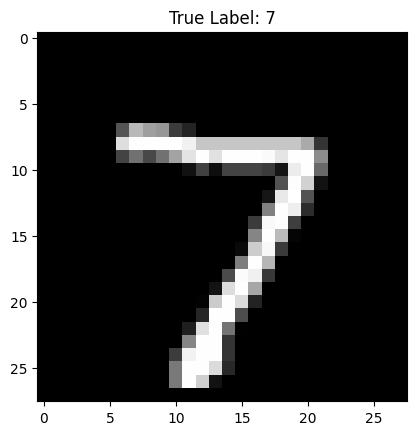

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Digit: 7


In [6]:
import numpy as np

# Pick a random test image
index = 0
img = x_test[index]

# Display it
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"True Label: {y_test[index]}")
plt.show()

# Predict
prediction = model.predict(img.reshape(1, 28, 28, 1))
print(f"Predicted Digit: {np.argmax(prediction)}")
